In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
highpass_sin = np.loadtxt('highpass_sin.csv')
lowpass_sin = np.loadtxt('lowpass_sin.csv')
tank_sin = np.loadtxt('tank_sin.csv')

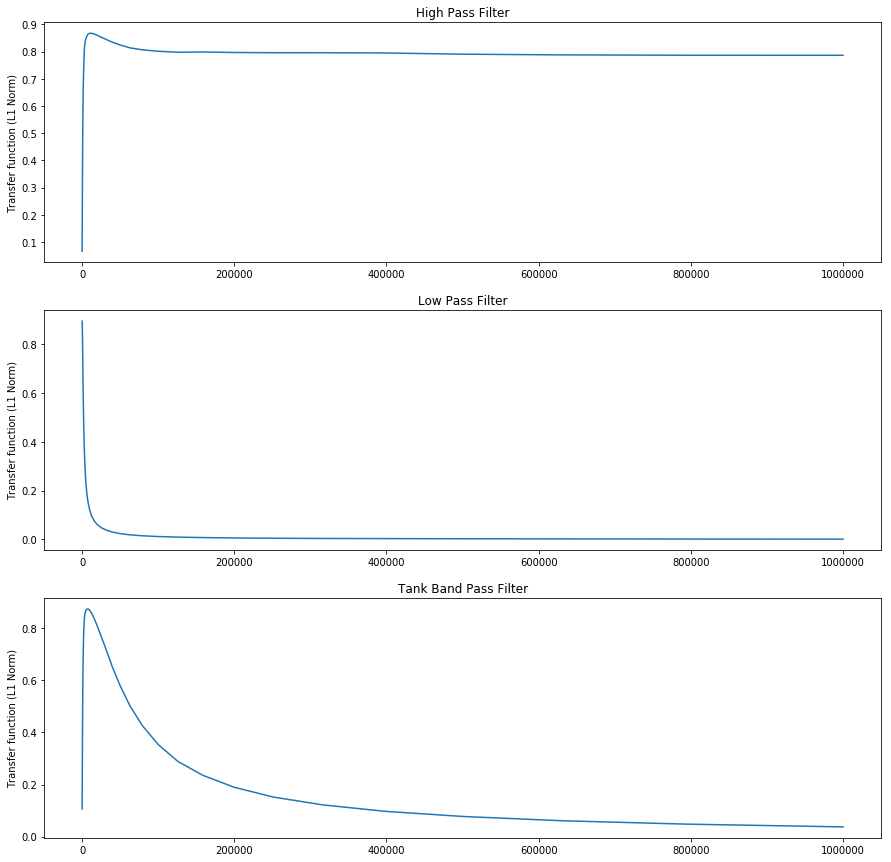

In [4]:
amps_hp_sin = highpass_sin[:, 1]
freqs_hp_sin = highpass_sin[:, 0]

amps_lp_sin = lowpass_sin[:, 1]
freqs_lp_sin = lowpass_sin[:, 0]

amps_tank_sin = tank_sin[:, 1]
freqs_tank_sin = tank_sin[:, 0]

plt.figure(figsize=(15,15)) 

plt.subplot(3, 1, 1)
plt.title('High Pass Filter')
plt.ylabel('Transfer function (L1 Norm)')
plt.plot(freqs_hp_sin, amps_hp_sin)

plt.subplot(3, 1, 2)
plt.title('Low Pass Filter')
plt.ylabel('Transfer function (L1 Norm)')
plt.plot(freqs_lp_sin, amps_lp_sin)

plt.subplot(3, 1, 3)
plt.title('Tank Band Pass Filter')
plt.ylabel('Transfer function (L1 Norm)')
plt.plot(freqs_tank_sin, amps_tank_sin)

plt.show()

In [40]:
lowpass_deformed = np.loadtxt('lowpass_deformed_clean.csv', delimiter=',')
lowpass_harmonic = np.loadtxt('lowpass_harmonic.csv')
lowpass_square_wave = np.loadtxt('square_wave_clean.csv', delimiter=',')

highpass_deformed = np.loadtxt('highpass_deformed_clean.csv', delimiter=',')
highpass_harmonic = np.loadtxt('highpass_harmonic.csv')
highpass_square_wave = np.loadtxt('square_wave_highpass_clean.csv', delimiter=',')

tank_deformed = np.loadtxt('tank_deformed_clean.csv', delimiter=',')
tank_harmonic = np.loadtxt('tank_harmonic.csv')
tank_square_wave = np.loadtxt('square_wave_tank_clean.csv', delimiter=',')

#print(lowpass_harmonic)

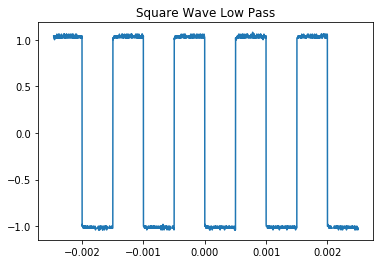

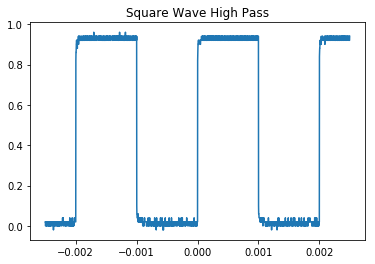

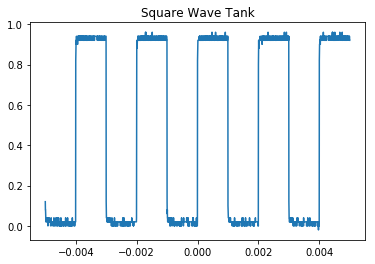

In [41]:
plt.figure()

plt.title('Square Wave Low Pass')
plt.plot(lowpass_square_wave[:,0], lowpass_square_wave[:,1])

plt.figure()

plt.title('Square Wave High Pass')
plt.plot(highpass_square_wave[:,0], highpass_square_wave[:,1])

plt.figure()

plt.title('Square Wave Tank')
plt.plot(tank_square_wave[:,0], tank_square_wave[:,1])

plt.show()

In [42]:
print(len(lowpass_deformed))
print(len(highpass_deformed))
print(len(highpass_deformed))


2482
2500
2500


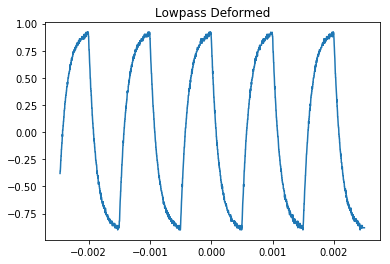

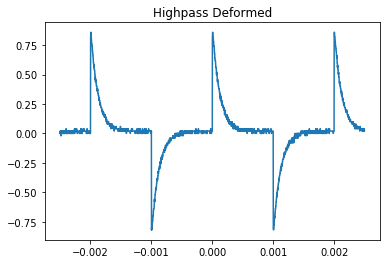

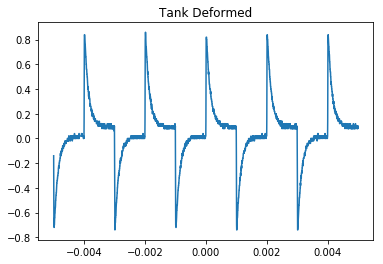

In [43]:
plt.figure()

plt.title('Lowpass Deformed')
plt.plot(lowpass_deformed[:, 0], lowpass_deformed[:, 1])

plt.figure()

plt.title('Highpass Deformed')
plt.plot(highpass_deformed[:, 0], highpass_deformed[:, 1])

plt.figure()

plt.title('Tank Deformed')
plt.plot(tank_deformed[:, 0], tank_deformed[:, 1])

plt.show()

The Fourier series for a square wave is given by

$$
sq(t) = \frac{4}{\pi}\sum_{\text{$k=1$, $k$ odd}}^\infty \frac{\sin(2\pi k f t)}{k} = \frac{4}{\pi} \left( \sin(2\pi f t) + (1/3) \sin(2\pi 3 f t) + (1/5)\sin(2\pi 5 ft) + \ldots\right)
$$

We check that this works.

In [9]:
f = 1

t = np.linspace(0,2,201) #two cycles, 100 points each

y1 = (4/np.pi)*np.sin(2*np.pi*f*t)
y3 = y1 + (4/(3*np.pi))*np.sin(2*np.pi*3*f*t)
y5 = y3 + (4/(5*np.pi))*np.sin(2*np.pi*5*f*t)

sqwave = np.sign(np.sin(2*np.pi*f*t)) #an actual square wave

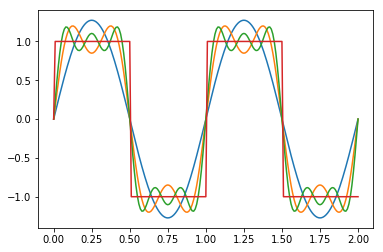

In [10]:
plt.figure()
plt.plot(t,y1, t,y3, t,y5, t, sqwave)
plt.show()

In [11]:
print(lowpass_harmonic)

[[ 1.000000e+03  6.916752e-01 -3.901698e+01]
 [ 2.000000e+03  4.630443e-01 -5.810412e+01]
 [ 3.000000e+03  3.346817e-01 -7.056493e+01]
 [ 4.000000e+03  2.596710e-01 -7.697031e+01]
 [ 5.000000e+03  2.116965e-01 -8.080109e+01]
 [ 6.000000e+03  1.781181e-01 -8.425645e+01]
 [ 7.000000e+03  1.550196e-01 -8.307996e+01]
 [ 8.000000e+03  1.364694e-01 -8.476899e+01]
 [ 9.000000e+03  1.208983e-01 -8.655511e+01]
 [ 1.000000e+04  1.090524e-01 -8.795503e+01]
 [ 1.100000e+04  9.932596e-02 -8.875814e+01]
 [ 1.200000e+04  9.134263e-02 -8.953727e+01]
 [ 1.300000e+04  8.661941e-02 -8.980640e+01]
 [ 1.400000e+04  8.139208e-02 -8.843297e+01]
 [ 1.500000e+04  7.314973e-02 -8.903134e+01]
 [ 1.600000e+04  6.873241e-02 -8.942706e+01]
 [ 1.700000e+04  6.505660e-02 -8.996464e+01]
 [ 1.800000e+04  6.152625e-02 -8.975073e+01]
 [ 1.900000e+04  5.855786e-02 -8.899215e+01]
 [ 2.000000e+04  5.603516e-02 -8.866324e+01]
 [ 2.100000e+04  5.334955e-02 -8.814617e+01]
 [ 2.200000e+04  5.084224e-02 -8.825219e+01]
 [ 2.30000

In [44]:
print(highpass_harmonic)

[[ 5.000000e+02  1.534841e-01  6.947263e+01]
 [ 1.000000e+03  2.627465e-01  5.316486e+01]
 [ 1.500000e+03  3.262522e-01  4.116687e+01]
 [ 2.000000e+03  3.656103e-01  3.338424e+01]
 [ 2.500000e+03  3.865289e-01  2.754959e+01]
 [ 3.000000e+03  4.031710e-01  2.029896e+01]
 [ 3.500000e+03  4.120477e-01  1.672975e+01]
 [ 4.000000e+03  4.172059e-01  1.322935e+01]
 [ 4.500000e+03  4.217597e-01  1.088610e+01]
 [ 5.000000e+03  4.238367e-01  9.141671e+00]
 [ 5.500000e+03  4.264448e-01  6.772779e+00]
 [ 6.000000e+03  4.274632e-01  4.820399e+00]
 [ 6.500000e+03  4.286078e-01  3.908510e+00]
 [ 7.000000e+03  4.308635e-01  5.863525e+00]
 [ 7.500000e+03  4.313020e-01  4.776165e+00]
 [ 8.000000e+03  4.311142e-01  3.921050e+00]
 [ 8.500000e+03  4.317537e-01  3.170959e+00]
 [ 9.000000e+03  4.325053e-01  2.171011e+00]
 [ 9.500000e+03  4.319427e-01  1.466047e+00]
 [ 1.000000e+04  4.316794e-01  6.878259e-01]
 [ 1.050000e+04  4.320780e-01 -3.004566e-01]
 [ 1.100000e+04  4.318179e-01 -5.828368e-01]
 [ 1.15000

In [45]:
print(tank_harmonic)

[[ 5.000000e+02  1.741550e-01  5.551164e+01]
 [ 1.000000e+03  2.849214e-01  4.314741e+01]
 [ 1.500000e+03  3.501116e-01  3.305657e+01]
 [ 2.000000e+03  3.844386e-01  2.563591e+01]
 [ 2.500000e+03  4.041731e-01  1.981439e+01]
 [ 3.000000e+03  4.200153e-01  1.289397e+01]
 [ 3.500000e+03  4.280133e-01  9.080729e+00]
 [ 4.000000e+03  4.317408e-01  5.535156e+00]
 [ 4.500000e+03  4.355094e-01  2.850045e+00]
 [ 5.000000e+03  4.371004e-01  5.603081e-01]
 [ 5.500000e+03  4.384612e-01 -1.523843e+00]
 [ 6.000000e+03  4.389959e-01 -4.228904e+00]
 [ 6.500000e+03  4.393134e-01 -5.919536e+00]
 [ 7.000000e+03  4.411316e-01 -4.520235e+00]
 [ 7.500000e+03  4.405077e-01 -5.659532e+00]
 [ 8.000000e+03  4.401360e-01 -7.440164e+00]
 [ 8.500000e+03  4.399037e-01 -8.389544e+00]
 [ 9.000000e+03  4.394524e-01 -1.002000e+01]
 [ 9.500000e+03  4.380449e-01 -1.152833e+01]
 [ 1.000000e+04  4.373904e-01 -1.217641e+01]
 [ 1.050000e+04  4.362443e-01 -1.361318e+01]
 [ 1.100000e+04  4.351137e-01 -1.432136e+01]
 [ 1.15000

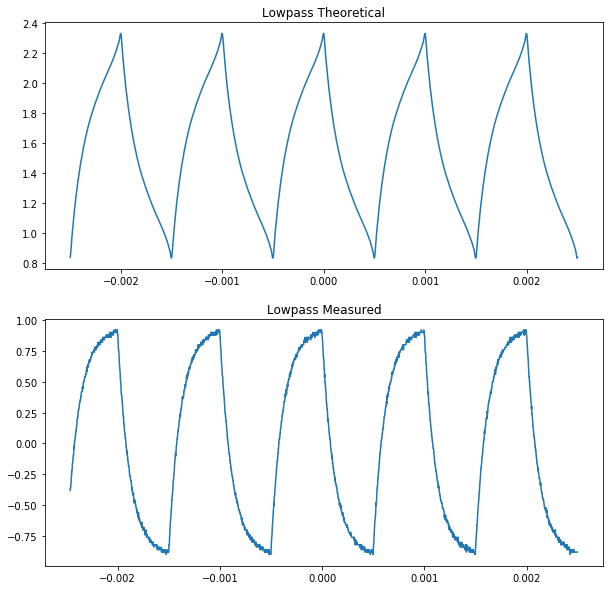

In [50]:
t = np.linspace(-0.0025,0.0025, num = len(lowpass_deformed))
f = 1000 # 1 khz sq wave

sq = np.zeros(len(t)) #preallocate the output array
for h in np.arange(1,40,1):
    if h % 2 == 0:
        sq -= lowpass_harmonic[h][1] * np.sin(lowpass_harmonic[h][2] * np.pi / 180)
    else:    
        sq -= lowpass_harmonic[h][1] * (4/(np.pi*h))*np.sin(2*np.pi*f*h*t + (lowpass_harmonic[h][2] * np.pi / 180))

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(t,sq)
plt.title('Lowpass Theoretical')

plt.subplot(2, 1, 2)
plt.plot(lowpass_deformed[:, 0], lowpass_deformed[:, 1])
plt.title('Lowpass Measured')

plt.show()

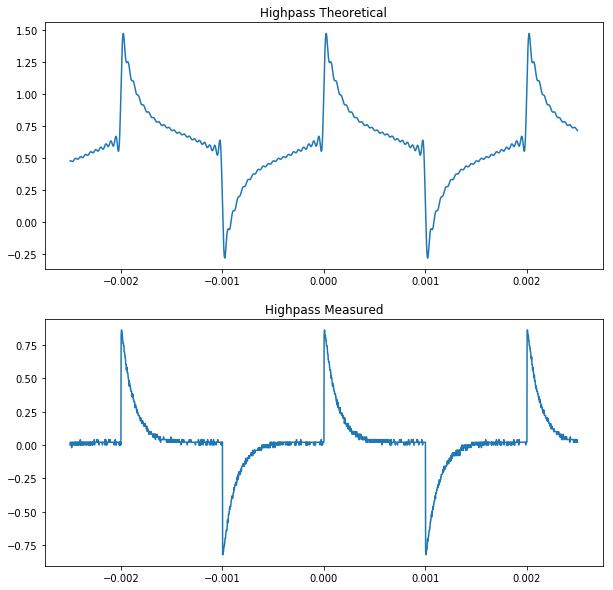

In [51]:
t = np.linspace(-0.0025,0.0025, num = len(lowpass_deformed))
f = 500 # 1 khz sq wave

sq = np.zeros(len(t)) #preallocate the output array
for h in np.arange(1,40,1):
    if h % 2 == 0:
        sq += highpass_harmonic[h][1] * np.sin(highpass_harmonic[h][2] * np.pi / 180)
    else:    
        sq += highpass_harmonic[h][1] * (4/(np.pi*h))*np.sin(2*np.pi*f*h*t + (highpass_harmonic[h][2] * np.pi / 180))

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(t,sq)
plt.title('Highpass Theoretical')

plt.subplot(2, 1, 2)
plt.plot(highpass_deformed[:, 0], highpass_deformed[:, 1])
plt.title('Highpass Measured')

plt.show()

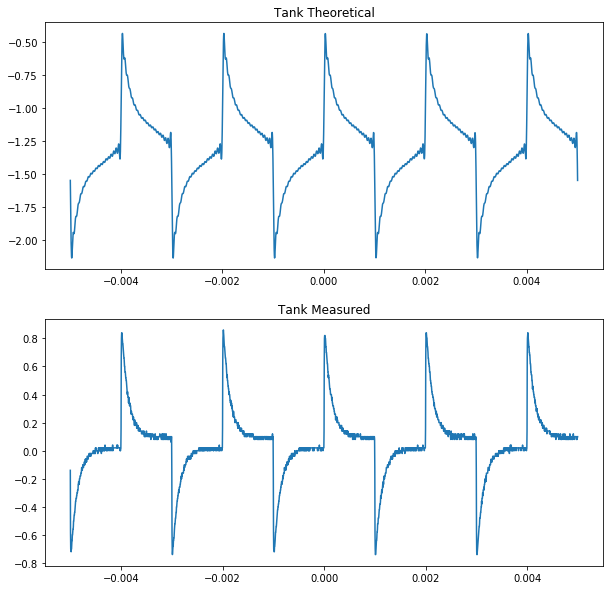

In [52]:
t = np.linspace(-0.005,0.005, num = len(lowpass_deformed))
f = 500 # 1 khz sq wave

sq = np.zeros(len(t)) #preallocate the output array
for h in np.arange(1,40,1):
    if h % 2 == 0:
        sq += tank_harmonic[h][1] * np.sin(tank_harmonic[h][2] * np.pi / 180)
    else:    
        sq += tank_harmonic[h][1] * (4/(np.pi*h))*np.sin(2*np.pi*f*h*t + (tank_harmonic[h][2] * np.pi / 180))

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(t,sq)
plt.title('Tank Theoretical')

plt.subplot(2, 1, 2)
plt.plot(tank_deformed[:, 0], tank_deformed[:, 1])
plt.title('Tank Measured')

plt.show()

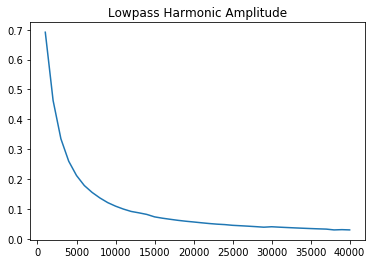

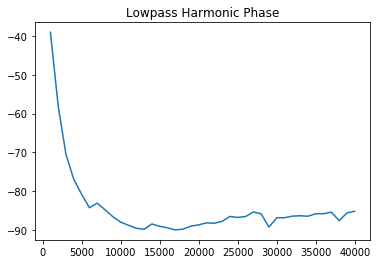

In [58]:
plt.figure()
plt.title('Lowpass Harmonic Amplitude')
plt.plot(lowpass_harmonic[:, 0], lowpass_harmonic[:, 1])

plt.figure()
plt.title('Lowpass Harmonic Phase')
plt.plot(lowpass_harmonic[:, 0], lowpass_harmonic[:, 2])

plt.show()

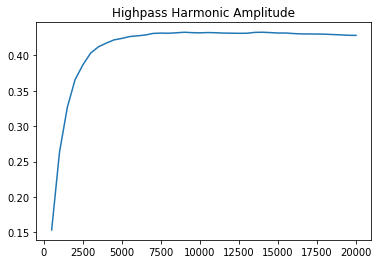

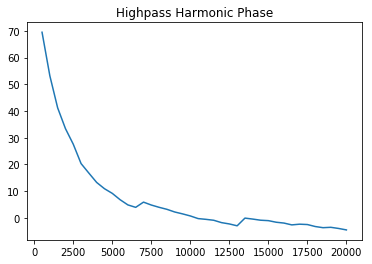

In [56]:
plt.figure()
plt.title('Highpass Harmonic Amplitude')
plt.plot(highpass_harmonic[:, 0], highpass_harmonic[:, 1])

plt.figure()
plt.title('Highpass Harmonic Phase')
plt.plot(highpass_harmonic[:, 0], highpass_harmonic[:, 2])

plt.show()

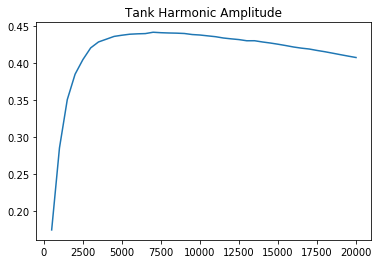

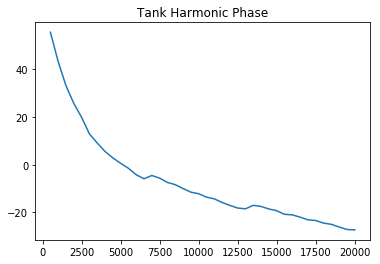

In [57]:
plt.figure()
plt.title('Tank Harmonic Amplitude')
plt.plot(tank_harmonic[:, 0], tank_harmonic[:, 1])

plt.figure()
plt.title('Tank Harmonic Phase')
plt.plot(tank_harmonic[:, 0], tank_harmonic[:, 2])

plt.show()